# Phase 1: Data Collection & Preprocessing

## Objectives: Data Analysis of “Energy Use and Greenhouse Gas Emissions in the Broader Public Sector” of Ontario region.
- dataset collection from Ontario's Open Data Portal.
- Source: [Ontario's Open Data Portal](https://data.ontario.ca/).
   - Dataset: Energy Use and Greenhouse Gas Emissions in the Broader Public Sector.
   - Files:
     - `2021_final_bps_dataset.xlsx`
     - `2022_final_data_set.xlsx`
     - `2023_final_data_set.xlsx`
   - 
2. Understand Dataset Structure**
   - Inspection of the dataset to understand its structure, columns, and data types.
   - Identifcation of key columns:
     - `Sector`, `Subsector`, `Organization`, `Property Name`, `Primary Property Type - Self Selected`.
     - Energy use columns: `Electricity Use - Grid Purchase (kWh)`, `Natural Gas Use (GJ)`, etc.
     - Emissions columns: `Total (Location-Based) GHG Emissions (Metric Tons CO2e)`.

- Cleaning and preprocessing the data to ensure it is ready for analysis.
- Documentation of all steps for reproducibility.


# To check the three datasets (2021, 2022, and 2023) have the same number of columns and columns names, we load the dataset compaere the number of columns and check if the column are identical across all datasets.

In [1]:
import pandas as pd

# to Load datasets
df_2021 = pd.read_excel(r"C:\Users\yamin\OneDrive\Desktop\python project\2021_final_bps_dataset.xlsx")
df_2022 = pd.read_excel(r"C:\Users\yamin\OneDrive\Desktop\python project\2022_final_data_set.xlsx")
df_2023 = pd.read_excel(r"c:\Users\yamin\OneDrive\Desktop\python project\2023_final_data_set.xlsx")

# to check the number of columns
print(f"Columns in 2021 dataset: {len(df_2021.columns)}")
print(f"Columns in 2022 dataset: {len(df_2022.columns)}")
print(f"Columns in 2023 dataset: {len(df_2023.columns)}")

# Comparision of column names in different datasets
print("\nColumns match across datasets?")
print(df_2021.columns.equals(df_2022.columns) and df_2022.columns.equals(df_2023.columns))

# to identify differences in column names (if any)
if not df_2021.columns.equals(df_2022.columns):
    print("\nDifferences between 2021 and 2022 columns:")
    print(set(df_2021.columns) ^ set(df_2022.columns))

if not df_2022.columns.equals(df_2023.columns):
    print("\nDifferences between 2022 and 2023 columns:")
    print(set(df_2022.columns) ^ set(df_2023.columns))

if not df_2021.columns.equals(df_2023.columns):
    print("\nDifferences between 2021 and 2023 columns:")
    print(set(df_2021.columns) ^ set(df_2023.columns))
    


Columns in 2021 dataset: 58
Columns in 2022 dataset: 58
Columns in 2023 dataset: 58

Columns match across datasets?
False

Differences between 2021 and 2022 columns:
{'Calculated with new source factors (Yes/No)', 'Year', 'Diesel #2 Use (GJ)', 'Diesel Use (GJ)'}

Differences between 2021 and 2023 columns:
{'Calculated with new source factors (Yes/No)', 'Year', 'Diesel #2 Use (GJ)', 'Diesel Use (GJ)'}


The issue here is that the 2021 dataset has different column names for these fields compared to the 2022 and 2023 datasets.
To resolve this, we standardize the column names across all datasets. 

In [2]:

# to map the mismatched column names in 2021 to match 2022 and 2023
column_mapping = {
    'Calculated with new source factors (Yes/No) (2021)': 'Calculated with new source factors (Yes/No)',
    'Diesel #2 Use (GJ) (2021)': 'Diesel #2 Use (GJ)',
    'Diesel Use (GJ) (2021)': 'Diesel Use (GJ)'
}

# Rename columns in the 2021 dataset
df_2021.rename(columns=column_mapping, inplace=True)

# to check column names after renaming
print("2021 Columns after renaming:", df_2021.columns.tolist())
print("2022 Columns:", df_2022.columns.tolist())
print("2023 Columns:", df_2023.columns.tolist())

# to add 'Year' column to each dataset (if not already present)
df_2021['Year'] = 2021
df_2022['Year'] = 2022
df_2023['Year'] = 2023

# to merge all datasets
df_all = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

# to view the merged dataset
print(df_all.head())  # Preview the first few rows
print(df_all['Year'].value_counts())  # Check the distribution of years

# to save the merged dataset to an Excel file which will be our final dataset
output_file = "merged_bps_data.xlsx"
df_all.to_excel(output_file, index=False)
print(f"Merged dataset saved to {output_file}")



2021 Columns after renaming: ['Sector', 'Subsector', 'Organization', 'Property Name', 'Primary Property Type - Self Selected', 'Portfolio Manager Property ID', 'Portfolio Manager Parent Property ID', 'Parent Property Name', 'Year Ending', 'Address', 'City', 'Postal Code', 'Property GFA - Self-Reported (m²)', 'Number of Buildings', 'Custom Property ID 1 - Name', 'Custom Property ID 1 - Value', 'Custom Property ID 2 - Name', 'Custom Property ID 2 - Value', 'Custom Property ID 3 - Name', 'Custom Property ID 3 - Value', 'Electricity Use - Grid Purchase (kWh)', 'Electricity Use - Grid Purchase (GJ)', 'Natural Gas Use (therms)', 'Natural Gas Use (GJ)', 'Fuel Oil #1 Use (GJ)', 'Fuel Oil #2 Use (GJ)', 'Fuel Oil #4 Use (GJ)', 'Fuel Oil #5 & 6 Use (GJ)', 'Diesel #2 Use (GJ)', 'Kerosene Use (GJ)', 'Propane Use (GJ)', 'District Steam Use (GJ)', 'District Hot Water Use (GJ)', 'District Chilled Water Use (GJ)', 'Wood Use (GJ)', 'Site Energy Use (GJ)', 'Source Energy Use (GJ)', 'Site EUI (GJ/m²)', 'S

# we merge the three dataset into one file.
 After joining the data set, a quick review of dataset,and identification of missing values.

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel(r"C:\Users\yamin\Downloads\merged_bps_data.xlsx")

# to view the final dataset
print("Initial Dataset Info:")
print(df.info())

# to check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())




Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38404 entries, 0 to 38403
Data columns (total 60 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Sector                                                         38404 non-null  object        
 1   Subsector                                                      38404 non-null  object        
 2   Organization                                                   38404 non-null  object        
 3   Property Name                                                  38404 non-null  object        
 4   Primary Property Type - Self Selected                          38404 non-null  object        
 5   Portfolio Manager Property ID                                  38404 non-null  int64         
 6   Portfolio Manager Parent Property ID                           38404 non

Data cleaning and conversinon of columns into numeric:

In [221]:
# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(column):
    # Remove non-numeric characters (e.g., commas, spaces, text)
    column = column.replace({',': '', ' ': '', '[^0-9.-]': ''}, regex=True)
    # Convert to numeric, coercing errors (e.g., text) to NaN
    return pd.to_numeric(column, errors='coerce')

# List of columns to clean and convert to numeric
numeric_columns = [
    'Electricity Use - Grid Purchase (kWh)', 'Electricity Use - Grid Purchase (GJ)',
    'Natural Gas Use (therms)', 'Natural Gas Use (GJ)',
    'Fuel Oil #1 Use (GJ)', 'Fuel Oil #2 Use (GJ)', 'Fuel Oil #4 Use (GJ)',
    'Fuel Oil #5 & 6 Use (GJ)', 'Diesel #2 Use (GJ)', 'Kerosene Use (GJ)',
    'Propane Use (GJ)', 'District Steam Use (GJ)', 'District Hot Water Use (GJ)',
    'District Chilled Water Use (GJ)', 'Wood Use (GJ)', 'Site Energy Use (GJ)',
    'Source Energy Use (GJ)', 'Site EUI (GJ/m²)', 'Site EUI (ekWh/sqft)',
    'Source EUI (GJ/m²)', 'Source EUI (ekWh/sqft)',
    'Weather Normalized Site Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
    'Weather Normalized Site EUI (GJ/m²)', 'Weather Normalized Site EUI (ekWh/sqft)',
    'Weather Normalized Source EUI (GJ/m²)', 'Weather Normalized Source EUI (ekWh/sqft)',
    'Total (Location-Based) GHG Emissions (Metric Tons CO2e)',
    'Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)',
    'Drinking Water Treatment & Distribution - Average Flow (m³PD)',
    'Wastewater Treatment Plant - Average Influent Flow (m³PD)'
]

#to convert the year columns to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
# to clean and convert numeric columns
df[numeric_columns] = df[numeric_columns].apply(clean_and_convert_to_numeric)

# to check conversion
print("\nData Types After Conversion:")
print(df[numeric_columns].dtypes)


Data Types After Conversion:
Electricity Use - Grid Purchase (kWh)                            float64
Electricity Use - Grid Purchase (GJ)                             float64
Natural Gas Use (therms)                                         float64
Natural Gas Use (GJ)                                             float64
Fuel Oil #1 Use (GJ)                                             float64
Fuel Oil #2 Use (GJ)                                             float64
Fuel Oil #4 Use (GJ)                                             float64
Fuel Oil #5 & 6 Use (GJ)                                         float64
Diesel #2 Use (GJ)                                               float64
Kerosene Use (GJ)                                                float64
Propane Use (GJ)                                                 float64
District Steam Use (GJ)                                          float64
District Hot Water Use (GJ)                                      float64
District Chilled Wate

Handling Missing Values:
1. Fill missing non-numeric values with a placeholder (e.g., "Unknown").
2. Remove duplicate rows from the dataset.

In [ ]:

# to fill missing values for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# to fill missing values for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna("Unknown")

# to remove duplicates
df.drop_duplicates(inplace=True)

#to check missing values after cleaning
print(df.isnull().sum())

Sector                                                           0
Subsector                                                        0
Organization                                                     0
Property Name                                                    0
Primary Property Type - Self Selected                            0
Portfolio Manager Property ID                                    0
Portfolio Manager Parent Property ID                             0
Parent Property Name                                             0
Year Ending                                                      0
Address                                                          0
City                                                             0
Postal Code                                                      0
Property GFA - Self-Reported (m²)                                0
Number of Buildings                                              0
Custom Property ID 1 - Name                                   

Save Preprocessed Data
The cleaned and preprocessed dataset is saved to a new Excel file.

In [223]:
# Save preprocessed data
df.to_excel("preprocessed_merged_data.xlsx", index=False)

print("\nPreprocessing completed. Cleaned dataset saved to 'preprocessed_merged_data.xlsx'.")




Preprocessing completed. Cleaned dataset saved to 'preprocessed_merged_data.xlsx'.


# # Phase 2: Exploratory & Statistical Analysis

## Objectives
- Perform exploratory data analysis (EDA) to understand the dataset.
- Compute descriptive statistics and identify trends.
- Create visualizations to uncover insights.

---

## Tasks

### 1. **Perform Descriptive Statistics**
   - to summarize metrics (mean, median, min/max, standard deviation) for numeric columns.


In [224]:
# to load the cleaned dataset
cleaned_df = pd.read_excel("preprocessed_merged_data.xlsx")

# to check the cleaned dataset
print("Cleaned Dataset Info:")
print(cleaned_df.info())

# Check summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(cleaned_df.select_dtypes(include=[np.number]).describe())

# Check unique values in non-numeric columns
print("\nUnique Values in Non-Numeric Columns:")
for col in cleaned_df.select_dtypes(exclude=[np.number]).columns:
    print(f"{col}: {cleaned_df[col].nunique()} unique values")

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38404 entries, 0 to 38403
Data columns (total 60 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Sector                                                         38404 non-null  object        
 1   Subsector                                                      38404 non-null  object        
 2   Organization                                                   38404 non-null  object        
 3   Property Name                                                  38404 non-null  object        
 4   Primary Property Type - Self Selected                          38404 non-null  object        
 5   Portfolio Manager Property ID                                  38404 non-null  int64         
 6   Portfolio Manager Parent Property ID                           38404 non

Major energy sources of Ontario BPS:

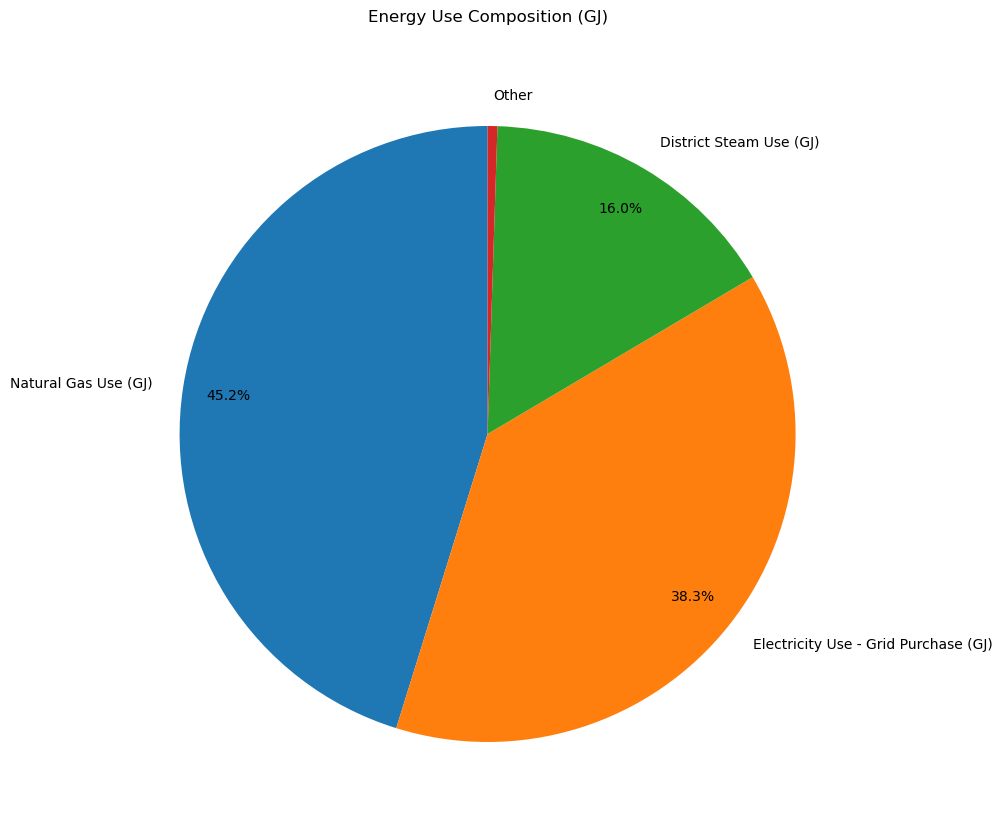

In [297]:
import matplotlib.pyplot as plt
# clolumns of different energy sources
energy_sources = df[['Electricity Use - Grid Purchase (GJ)', 'Natural Gas Use (GJ)',
    'Fuel Oil #1 Use (GJ)', 'Fuel Oil #2 Use (GJ)', 'Fuel Oil #4 Use (GJ)',
    'Fuel Oil #5 & 6 Use (GJ)', 'Diesel #2 Use (GJ)', 'Propane Use (GJ)',
    'District Steam Use (GJ)',]].mean()

# Group sources with very little contricution into "Other"
threshold = energy_sources.sum() * 0.01
energy_sources = energy_sources.sort_values(ascending=False)
other = energy_sources[energy_sources <= threshold].sum()
energy_sources = energy_sources[energy_sources > threshold]
energy_sources['Other'] = other

# Create clean pie chart
plt.figure(figsize=(10, 10))
energy_sources.plot(kind='pie',
                     autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
                     pctdistance=0.85,
                     startangle=90)
plt.title('Energy Use Composition (GJ)', pad=20)
plt.ylabel('')
plt.show()

## Energy Consumption Analysis
Analyze energy consumption by different primary property type

Energy Consumption by property: Primary Property Type - Self Selected
Adult Education                            849.681250
Ambulatory Surgical Center               82017.800000
College/University                       36808.401140
Convenience Store without Gas Station       70.950000
Convention Center                        17679.033333
                                             ...     
Transportation Terminal/Station          12014.203645
Urgent Care/Clinic/Other Outpatient       9156.041667
Veterinary Office                         1441.100000
Vocational School                           25.966667
Wastewater Treatment Plant                6391.091739
Name: Site Energy Use (GJ), Length: 61, dtype: float64


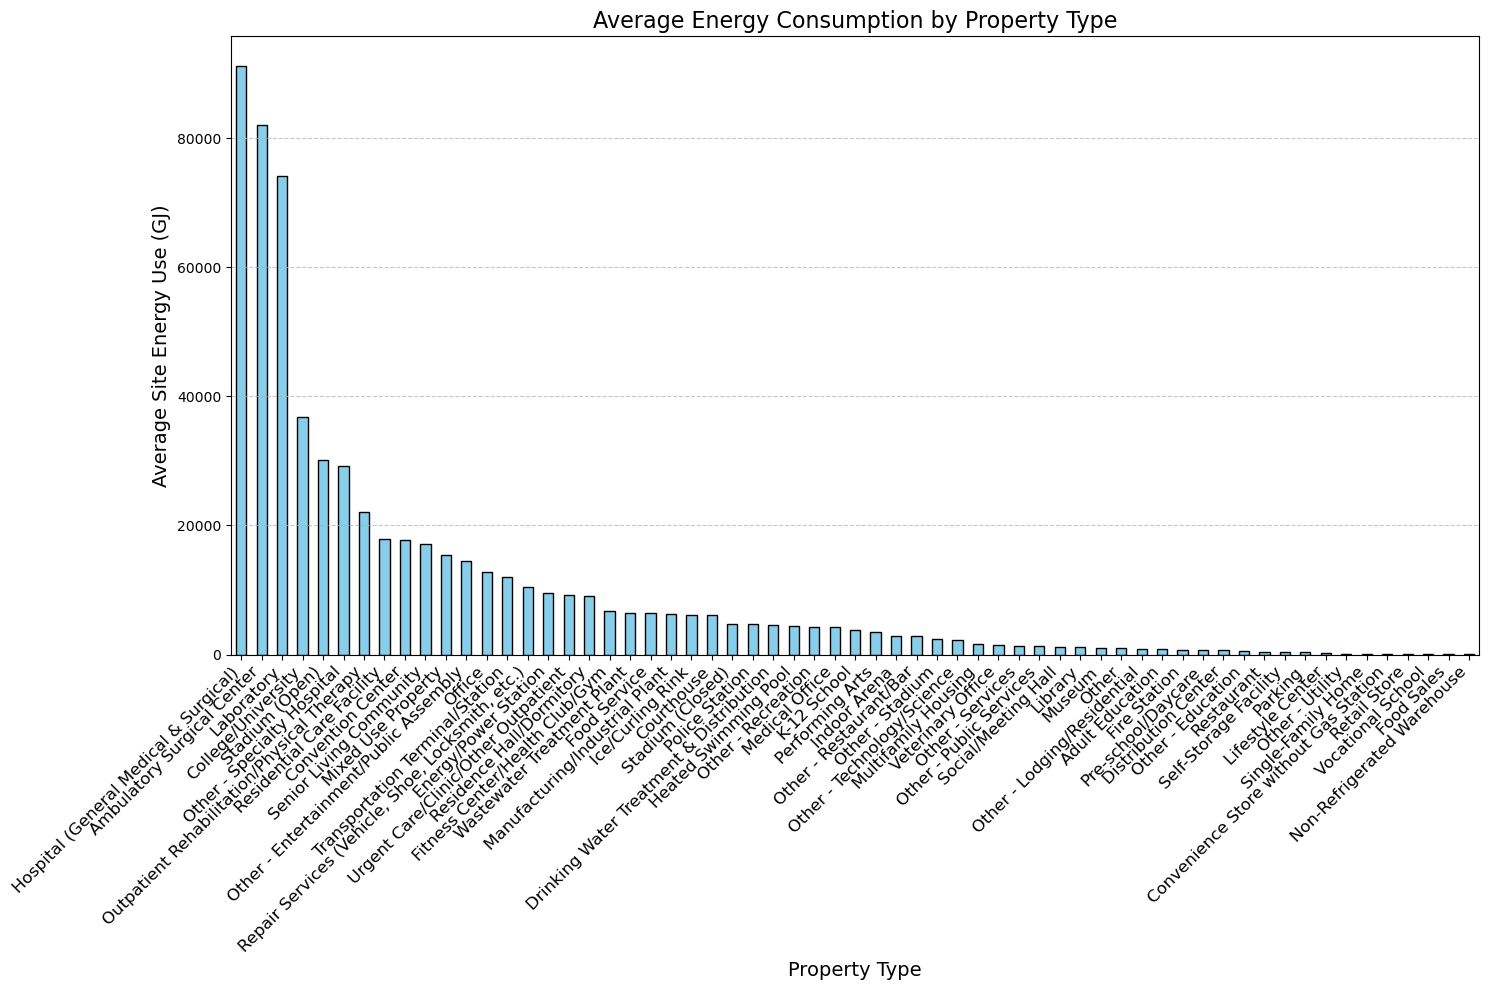

In [ ]:
import matplotlib.pyplot as plt
#Average energy consumption by different property types
energy_consumption_by_property_type = df.groupby('Primary Property Type - Self Selected')['Site Energy Use (GJ)'].mean()


# Display the statistical summary
print("Energy Consumption by property:",energy_consumption_by_property_type)

# to Plot the bar chart for average energy consumption by property type in descending order
plt.figure(figsize=(15, 10))
energy_consumption_by_property_type.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Energy Consumption by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Average Site Energy Use (GJ)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## GHG Emissions Analysis
Analyze greenhouse gas emissions data

Average GHG Emissions Intensity by Property Type:
Primary Property Type - Self Selected
Adult Education                            32.848438
Ambulatory Surgical Center               2839.400000
College/University                       1291.151295
Convenience Store without Gas Station       2.050000
Convention Center                         715.566667
                                            ...     
Transportation Terminal/Station           234.506150
Urgent Care/Clinic/Other Outpatient       298.041667
Veterinary Office                          66.200000
Vocational School                           0.200000
Wastewater Treatment Plant                141.695149
Name: Total (Location-Based) GHG Emissions (Metric Tons CO2e), Length: 61, dtype: float64


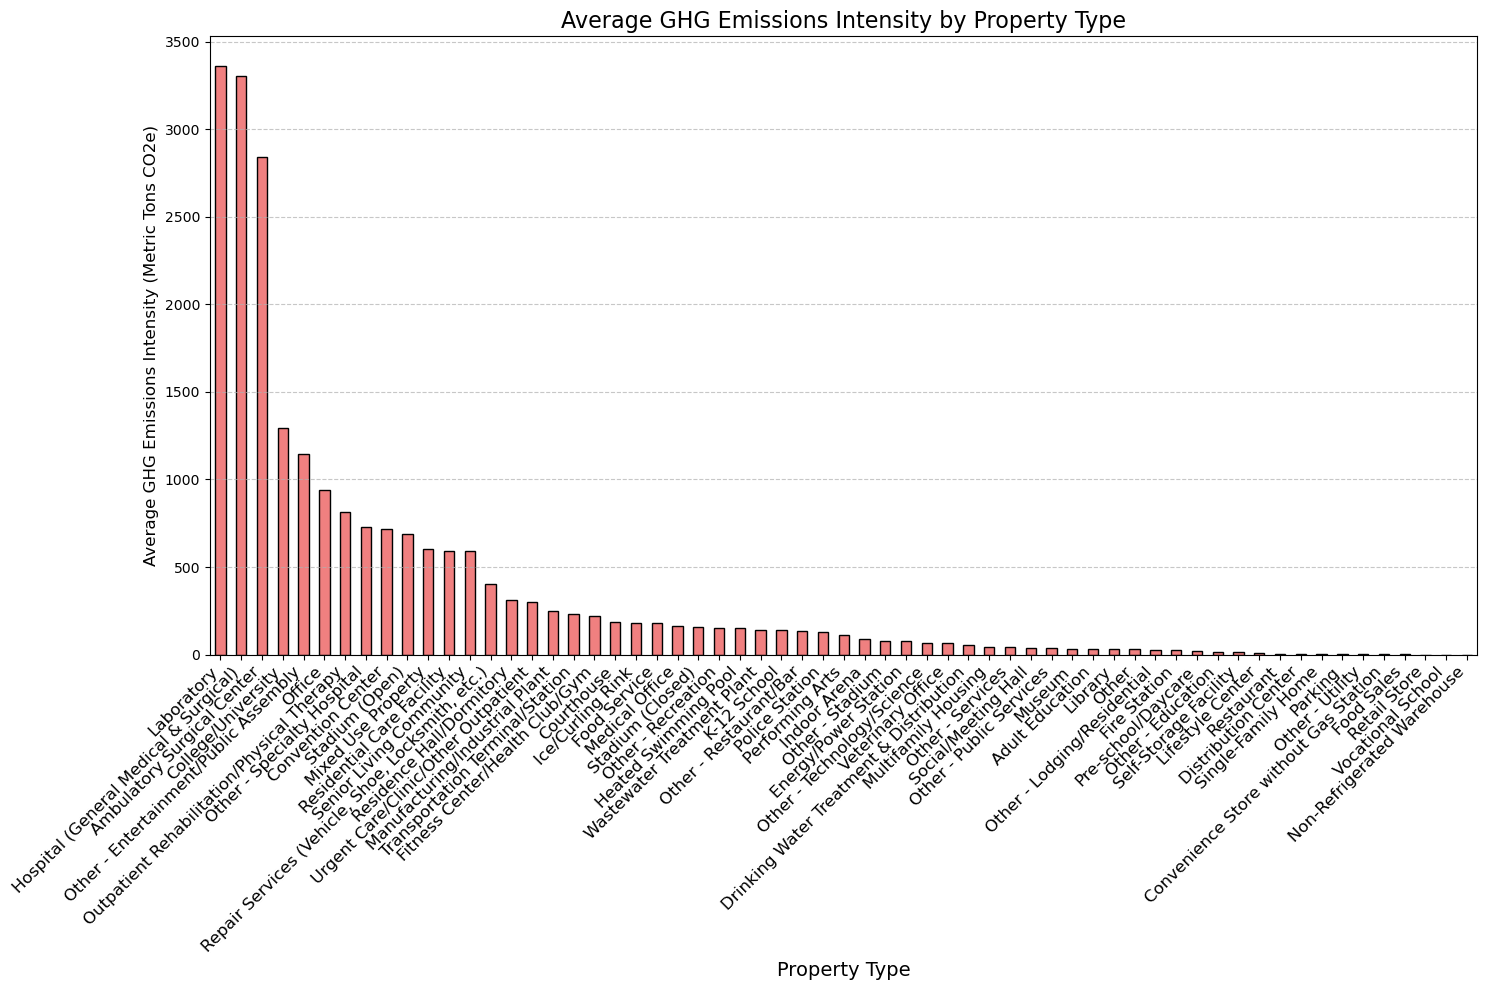

In [ ]:
# average GHG emissions by property type
ghg_emissions_by_property_type = df.groupby('Primary Property Type - Self Selected')['Total (Location-Based) GHG Emissions (Metric Tons CO2e)'].mean()

# Display the grouped data
print("Average GHG Emissions Intensity by Property Type:")
print(ghg_emissions_by_property_type)

# bar chart to view the average GHG emissions intensity by property type in descending order
plt.figure(figsize=(15, 10))
ghg_emissions_by_property_type.sort_values(ascending=False).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average GHG Emissions Intensity by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Average GHG Emissions Intensity (Metric Tons CO2e)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Energy Consumption Trends
Visualization of trends in energy consumption over time to identify patterns.

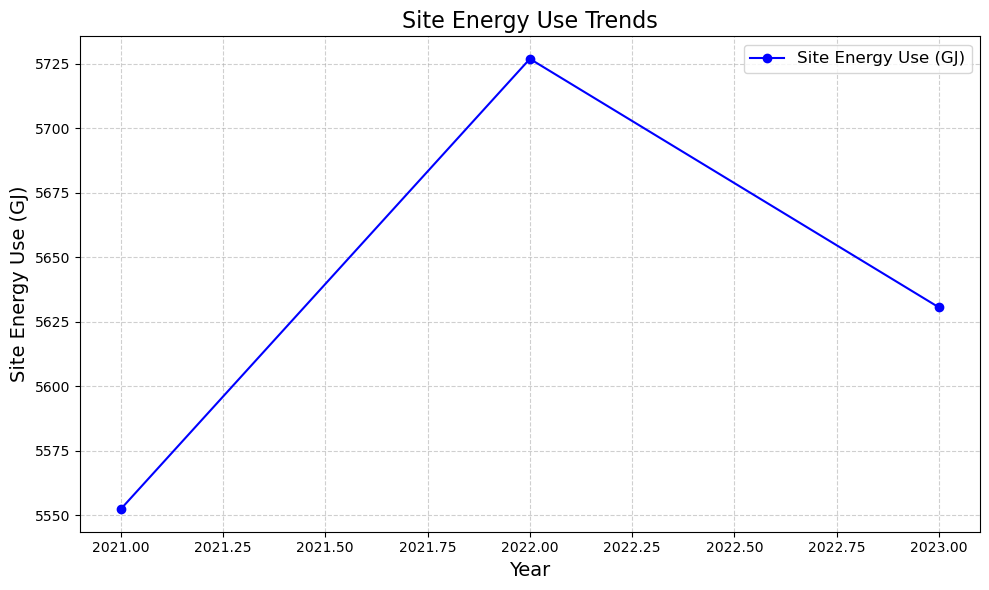

In [ ]:
import matplotlib.pyplot as plt

#average energy consumption by year
yearly_trends_energy = df.groupby('Year')['Site Energy Use (GJ)'].mean()

# Plot total energy consumption trends over time
plt.figure(figsize=(10, 6))  
plt.plot(yearly_trends_energy, marker='o', linestyle='-', color='b', label='Site Energy Use (GJ)')
plt.title('Site Energy Use Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Site Energy Use (GJ)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.legend(fontsize=12)
plt.tight_layout()  
plt.show()
plt.show()

## GHG Emissions Trends
to visualize trends in GHG emissions over time to identify patterns.

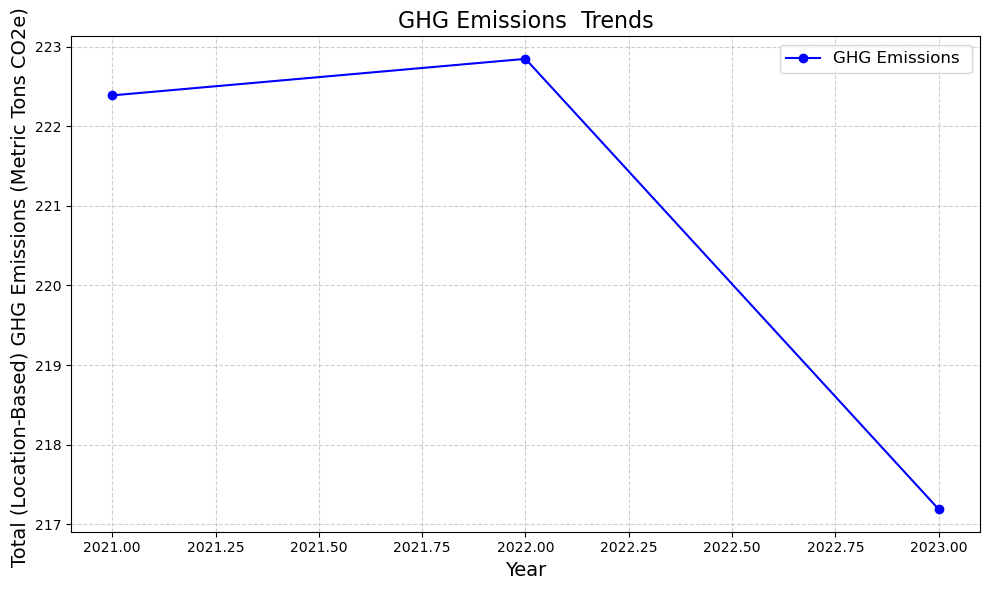

In [ ]:
# GHG Emissions Trends

# average GHG emissions by year
yearly_trends = df.groupby('Year')['Total (Location-Based) GHG Emissions (Metric Tons CO2e)'].mean()

# to plot GHG emissions trends over time
plt.figure(figsize=(10, 6))  
plt.plot(yearly_trends, marker='o', linestyle='-', color='b', label='GHG Emissions ')
plt.title('GHG Emissions  Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total (Location-Based) GHG Emissions (Metric Tons CO2e) ', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.legend(fontsize=12)
plt.tight_layout()  
plt.show()
plt.show()

## Comparison by City
to perform comparision energy consumption of and emissions across different cities in the dataset.

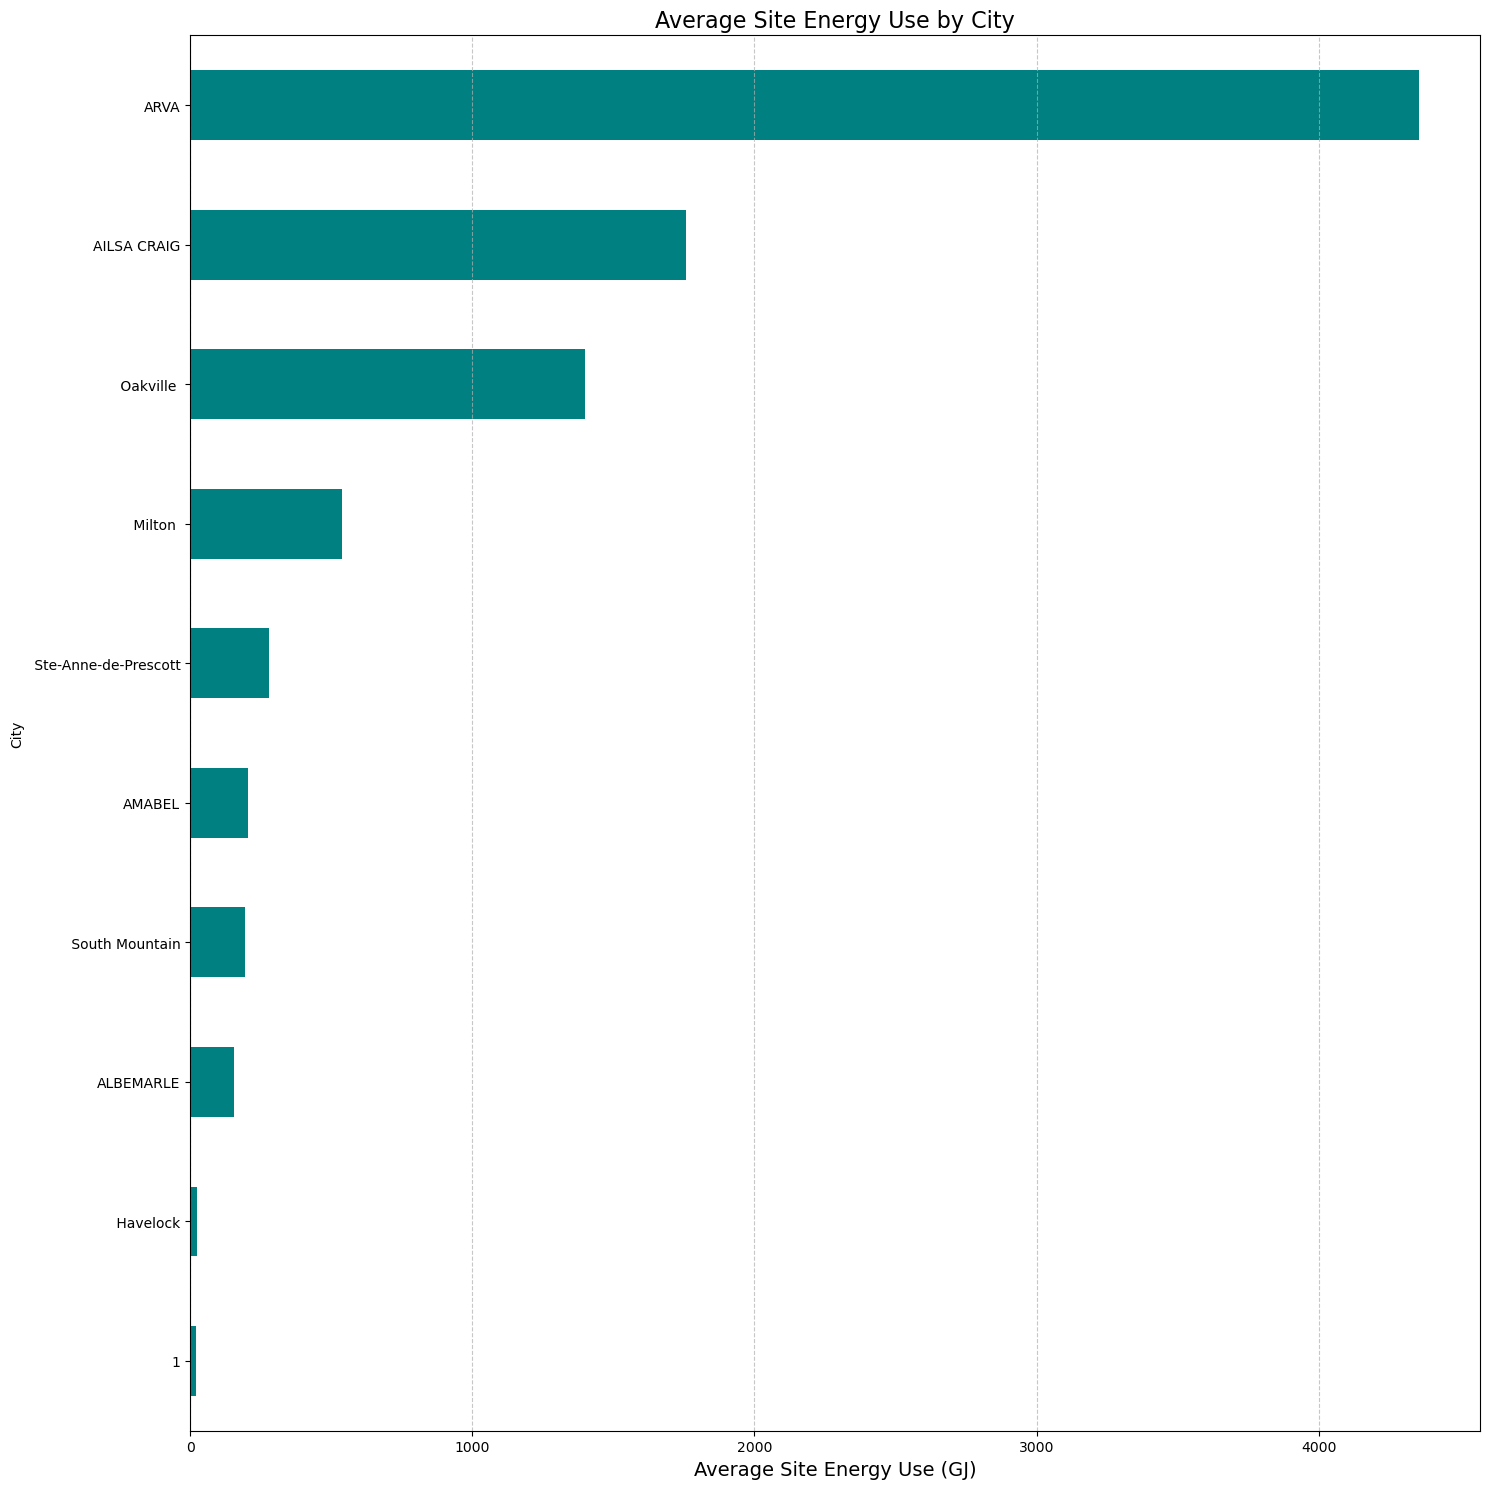

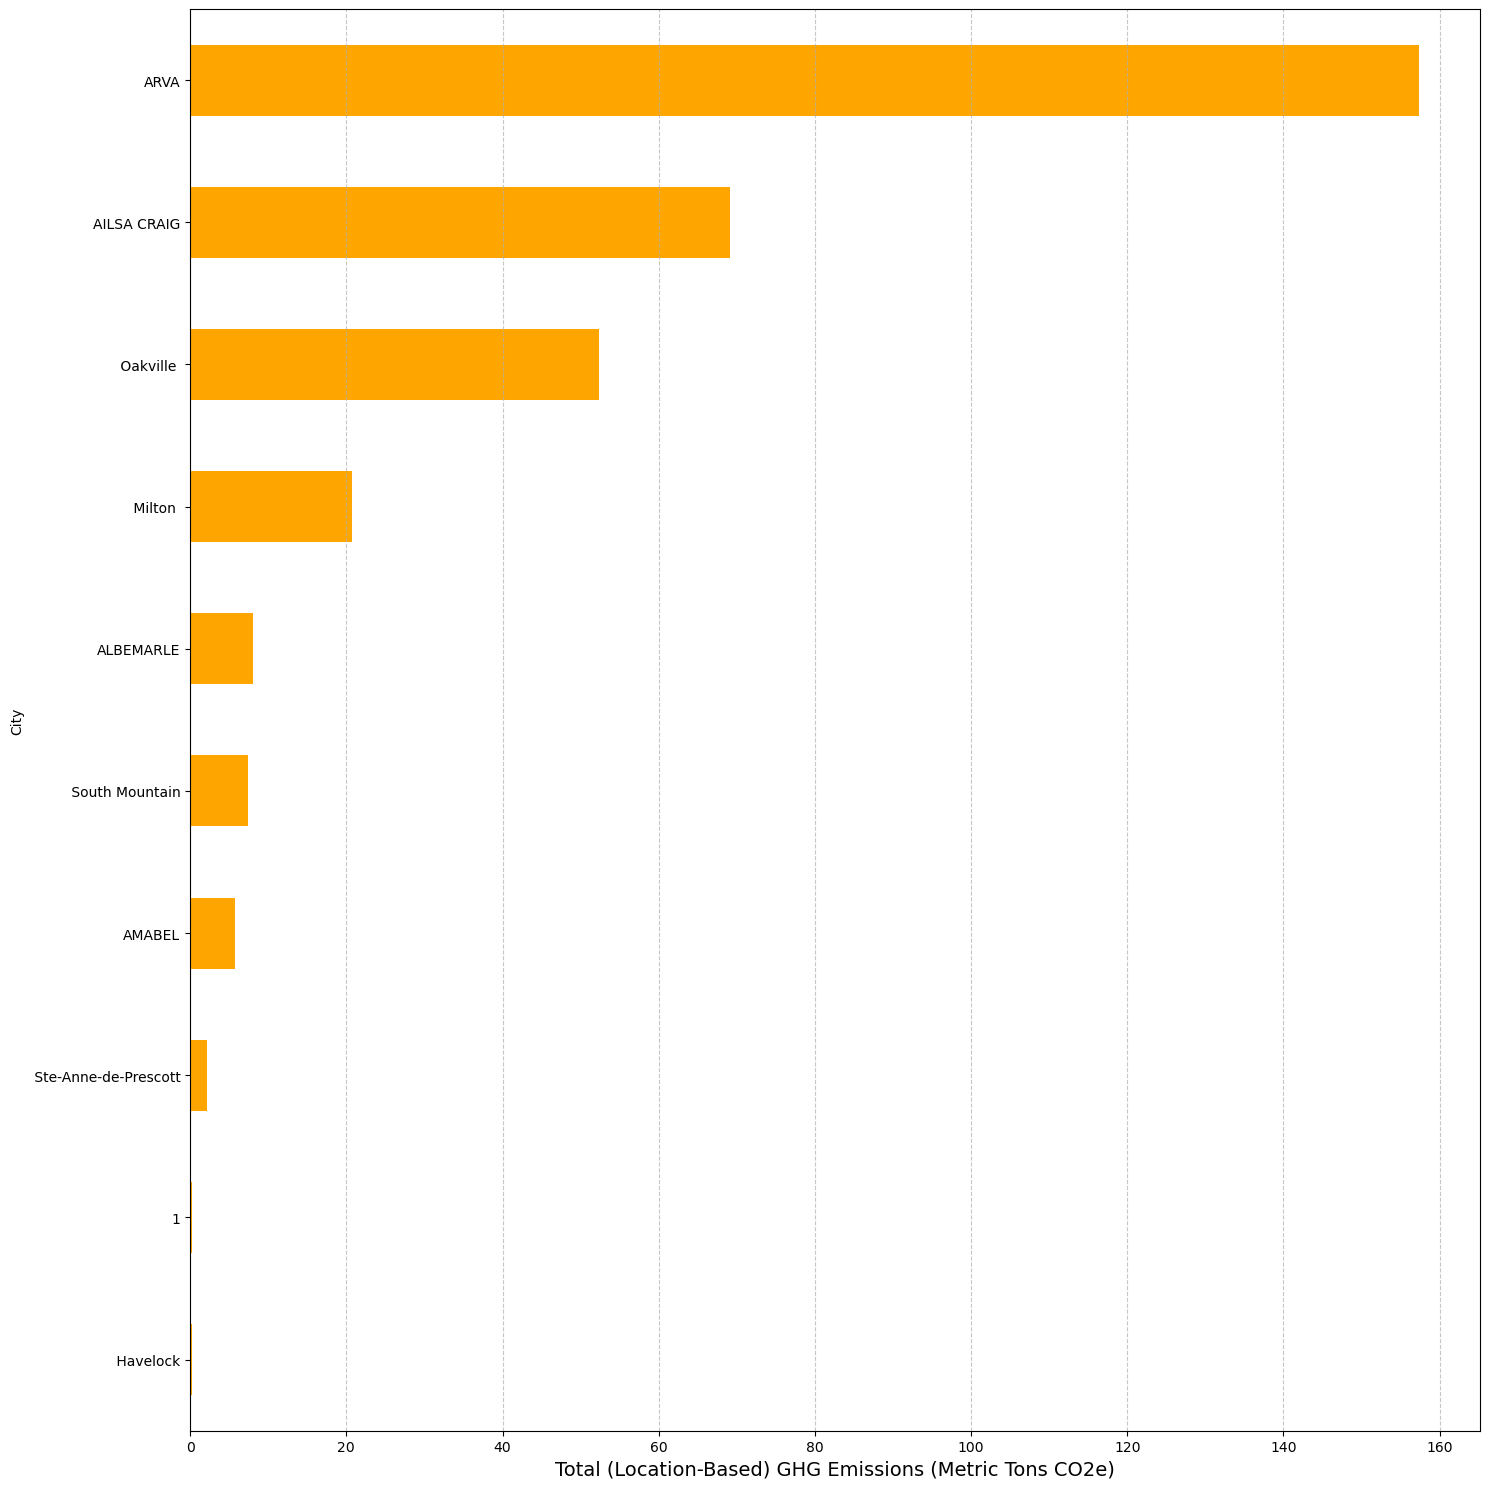

In [ ]:
# Comparison by City

# Average energy consumption by city
city_summary = df.groupby('City')['Site Energy Use (GJ)'].mean()

# Plot average energy consumption by city
plt.figure(figsize=(15, 15))
city_summary.head(10).sort_values().plot(kind='barh', color='teal')
plt.title('Average Site Energy Use by City', fontsize=16)
plt.xlabel('Average Site Energy Use (GJ)', fontsize=14)
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average GHG emissions by city
city_summary = df.groupby('City')['Total (Location-Based) GHG Emissions (Metric Tons CO2e)'].mean()

# Plot average GHG emissions by city
plt.figure(figsize=(15, 15))
city_summary.head(10).sort_values().plot(kind='barh', color='orange')
plt.title('', fontsize=16)
plt.xlabel('Total (Location-Based) GHG Emissions (Metric Tons CO2e)', fontsize=14)
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation Analysis
Perform correlation analysis to identify relationships between energy consumption, emissions, and other variables.

In [ ]:
# statistics for electricity use
print(df['Electricity Use - Grid Purchase (kWh)'].describe())

count    3.840400e+04
mean     5.986227e+05
std      3.826832e+06
min      0.000000e+00
25%      1.311130e+04
50%      9.088735e+04
75%      3.268734e+05
max      2.191629e+08
Name: Electricity Use - Grid Purchase (kWh), dtype: float64


To identify correlation among all the columns

In [ ]:
# Correlation Analysis

# correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                                    Portfolio Manager Property ID  \
Portfolio Manager Property ID                                            1.000000   
Property GFA - Self-Reported (m²)                                       -0.006237   
Number of Buildings                                                      0.006733   
Electricity Use - Grid Purchase (kWh)                                   -0.000970   
Electricity Use - Grid Purchase (GJ)                                    -0.000970   
Natural Gas Use (therms)                                                -0.016099   
Natural Gas Use (GJ)                                                    -0.016099   
Fuel Oil #1 Use (GJ)                                                    -0.001855   
Fuel Oil #2 Use (GJ)                                                    -0.007878   
Fuel Oil #4 Use (GJ)                                                    -0.003357   
Fuel Oil #5 & 6 Use (GJ)                     

Focus on properties with the highest energy consumption and emissions for targeted interventions.
Promote energy-efficient technologies such as LED lighting and high-efficiency HVAC systems.
Encourage the use of renewable energy sources to reduce reliance on fossil fuels.
Implement regular energy audits to identify inefficiencies and track progress.

Track yearly changes in energy use/emissions.

In [ ]:
#2. Compare electricity Usage Across Building Types
#  Average electricity use by building type
building_type_stats = df.groupby('Primary Property Type - Self Selected')['Electricity Use - Grid Purchase (kWh)'].mean()
print(building_type_stats)

Primary Property Type - Self Selected
Adult Education                          6.468230e+04
Ambulatory Surgical Center               8.394006e+06
College/University                       3.794391e+06
Convenience Store without Gas Station    9.894200e+03
Convention Center                        1.897677e+06
                                             ...     
Transportation Terminal/Station          2.318624e+06
Urgent Care/Clinic/Other Outpatient      1.062674e+06
Veterinary Office                        4.100397e+04
Vocational School                        7.213667e+03
Wastewater Treatment Plant               1.198039e+06
Name: Electricity Use - Grid Purchase (kWh), Length: 61, dtype: float64


In [ ]:
#3. Analyze Correlation Between Variables
# Correlation matrix
corr_matrix = df[['Property GFA - Self-Reported (m²)', 'Electricity Use - Grid Purchase (kWh)']].corr()
print(corr_matrix)

                                       Property GFA - Self-Reported (m²)  \
Property GFA - Self-Reported (m²)                               1.000000   
Electricity Use - Grid Purchase (kWh)                           0.416501   

                                       Electricity Use - Grid Purchase (kWh)  
Property GFA - Self-Reported (m²)                                   0.416501  
Electricity Use - Grid Purchase (kWh)                               1.000000  


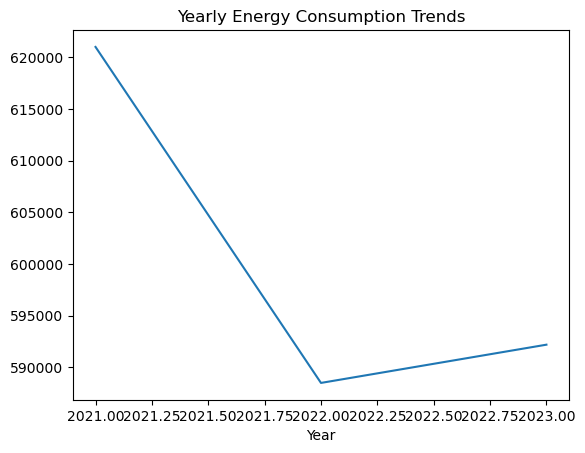

In [ ]:
#4. Identification of Trends Over Time
#  Yearly energy use trends
import matplotlib.pyplot as plt
yearly_trends = df.groupby('Year')['Electricity Use - Grid Purchase (kWh)'].mean()
yearly_trends.plot(kind='line', title='Yearly Energy Consumption Trends')
plt.show()

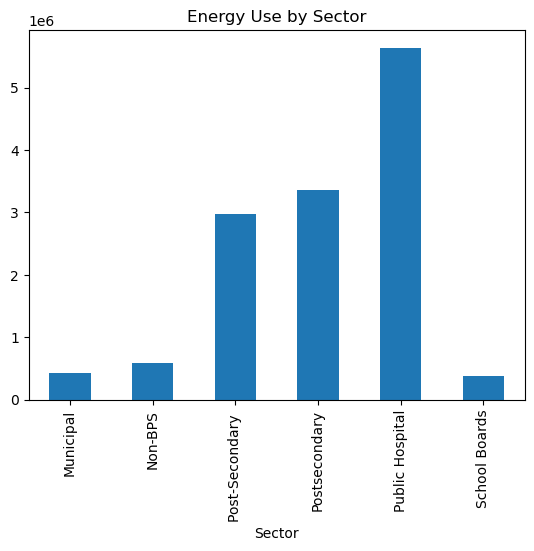

In [ ]:
#5. Benchmarking Across Sectors
#  electricity use by sector
sector_comparison = df.groupby('Sector')['Electricity Use - Grid Purchase (kWh)'].mean()
sector_comparison.plot(kind='bar', title='Energy Use by Sector')
plt.show()

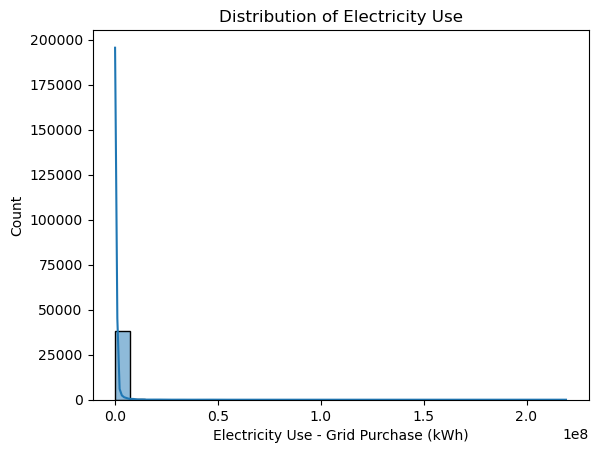

In [ ]:

#Histogram of electricity use
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Electricity Use - Grid Purchase (kWh)'], bins=30, kde=True)
plt.title('Distribution of Electricity Use')
plt.show()

1. Data Exploration

In [ ]:
# Top sectors by property count
print(df['Sector'].value_counts().head(10))

# Energy summary stats
print(df[['Electricity Use - Grid Purchase (kWh)', 
           'Natural Gas Use (GJ)',
           'Site Energy Use (GJ)']].describe())

# GHG emissions overview
print(df['Total (Location-Based) GHG Emissions (Metric Tons CO2e)'].describe())

Sector
Municipal          26597
School Boards       9707
Post-Secondary       917
Public Hospital      719
Postsecondary        340
Non-BPS              124
Name: count, dtype: int64
       Electricity Use - Grid Purchase (kWh)  Natural Gas Use (GJ)  \
count                           3.840400e+04          3.840400e+04   
mean                            5.986227e+05          2.543830e+03   
std                             3.826832e+06          2.410991e+04   
min                             0.000000e+00         -9.336000e+02   
25%                             1.311130e+04          0.000000e+00   
50%                             9.088735e+04          2.741000e+02   
75%                             3.268734e+05          1.575500e+03   
max                             2.191629e+08          1.638165e+06   

       Site Energy Use (GJ)  
count          3.840400e+04  
mean           5.644541e+03  
std            7.443990e+04  
min           -4.313000e+02  
25%            1.044000e+02  
50%   

Trend Identification of energy consumption and GHG emission

      Site Energy Use (GJ)  \
Year                         
2021           5552.413894   
2022           5726.906833   
2023           5630.574799   

      Total (Location-Based) GHG Emissions (Metric Tons CO2e)  
Year                                                           
2021                                         222.390255        
2022                                         222.849653        
2023                                         217.187136        


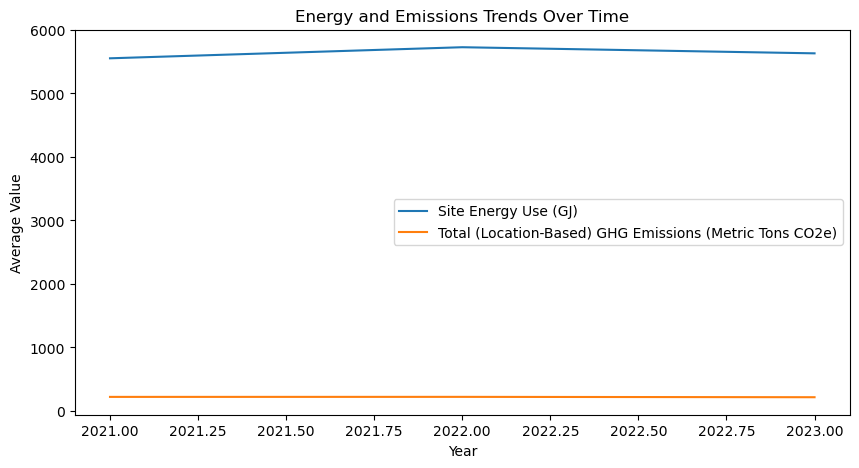

In [ ]:
# Extract year from date
df['Year'] = df['Year Ending'].dt.year

# Yearly trends
yearly_trends = df.groupby('Year').agg({
    'Site Energy Use (GJ)': 'mean',
    'Total (Location-Based) GHG Emissions (Metric Tons CO2e)': 'mean'
})
print(yearly_trends)

# Plotting
yearly_trends.plot(figsize=(10,5))
plt.title('Energy and Emissions Trends Over Time')
plt.ylabel('Average Value')
plt.show()

Benchmarking

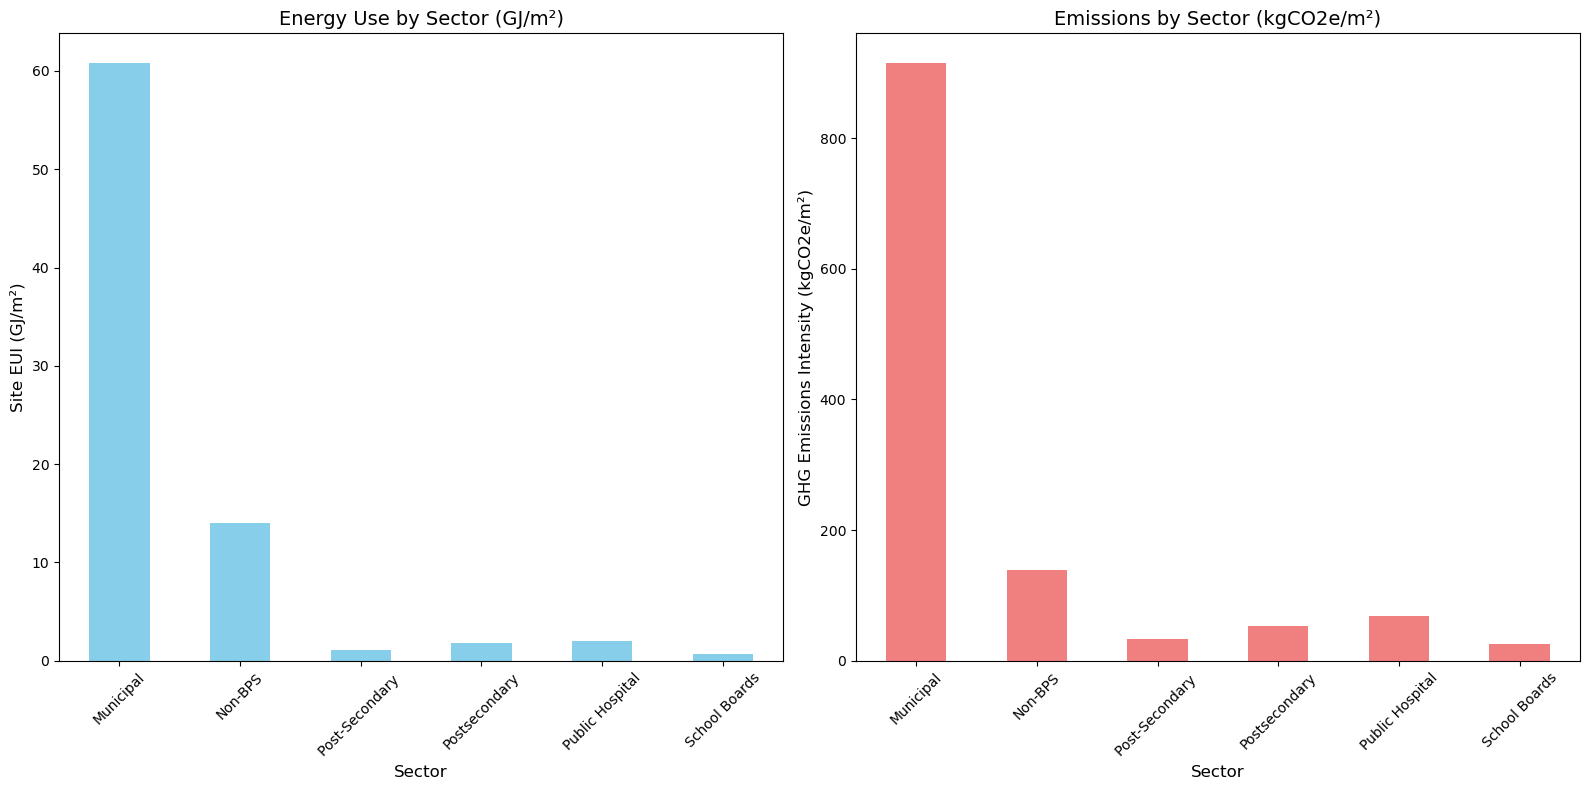

In [ ]:
# Average energy intesity by sector
sector_comparison = df.groupby('Sector').agg({'Site EUI (GJ/m²)': 'mean'})

# Average emissions intensity by sector
sector_comparison_emission = df.groupby('Sector').agg({'Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)': 'mean'})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Plot for energy use by sector
sector_comparison.plot(kind='bar', ax=axes[0], color='skyblue', legend=False)
axes[0].set_title('Energy Use by Sector (GJ/m²)', fontsize=14)
axes[0].set_xlabel('Sector', fontsize=12)
axes[0].set_ylabel('Site EUI (GJ/m²)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot for emissions by sector
sector_comparison_emission.plot(kind='bar', ax=axes[1], color='lightcoral', legend=False)
axes[1].set_title('Emissions by Sector (kgCO2e/m²)', fontsize=14)
axes[1].set_xlabel('Sector', fontsize=12)
axes[1].set_ylabel('GHG Emissions Intensity (kgCO2e/m²)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

 Optimization Opportunities

In [ ]:
# to identify buildings with high energy use
high_energy_threshold = df['Site Energy Use (GJ)'].quantile(0.95)
high_energy_buildings = df[df['Site Energy Use (GJ)'] > high_energy_threshold]

print("High Energy Buildings:")
print(high_energy_buildings[['Property Name', 'Sector', 
                           'Site Energy Use (GJ)', 
                           'Site EUI (GJ/m²)']].sort_values('Site Energy Use (GJ)', ascending=False))

High Energy Buildings:
                                          Property Name           Sector  \
16515                                         CITY HALL        Municipal   
1471                                          CITY HALL        Municipal   
30375                                         CITY HALL        Municipal   
28318            University of Toronto St George Campus  Post-Secondary    
35697            University of Toronto St George Campus  Post-Secondary    
...                                                 ...              ...   
10767  ÉSC Algonquin & ÉSC Algonquin  (pavillon 7 et 8)    School Boards   
19571                                   TRANSIT WINDSOR        Municipal   
31141                                     400 CITY HALL        Municipal   
10488               Stratford District Secondary School    School Boards   
13073                                St Charles College    School Boards   

       Site Energy Use (GJ)  Site EUI (GJ/m²)  
16515           

**## Phase 3: Advanced Analysis & Predictive Modeling**

1.Clustering Analysis
K-Means clustering is used to group buildings based on their energy use and other features.
Identification of common characteristics in high-energy-consuming buildings.

In [ ]:
# relevant features for clustering
cluster_features = df[['Site EUI (GJ/m²)', 
                      'Total (Location-Based) GHG Emissions (Metric Tons CO2e)',
                      'Property GFA - Self-Reported (m²)',
                      'Electricity Use - Grid Purchase (kWh)',
                      'Natural Gas Use (GJ)']].copy()

# Convert electricity to GJ for consistency (1 kWh = 0.0036 GJ)
cluster_features['Electricity_GJ'] = cluster_features['Electricity Use - Grid Purchase (kWh)'] * 0.0036
cluster_features.drop('Electricity Use - Grid Purchase (kWh)', axis=1, inplace=True)

# Normalize the data (crucial for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

Step 2: Determine Optimal Number of Clusters

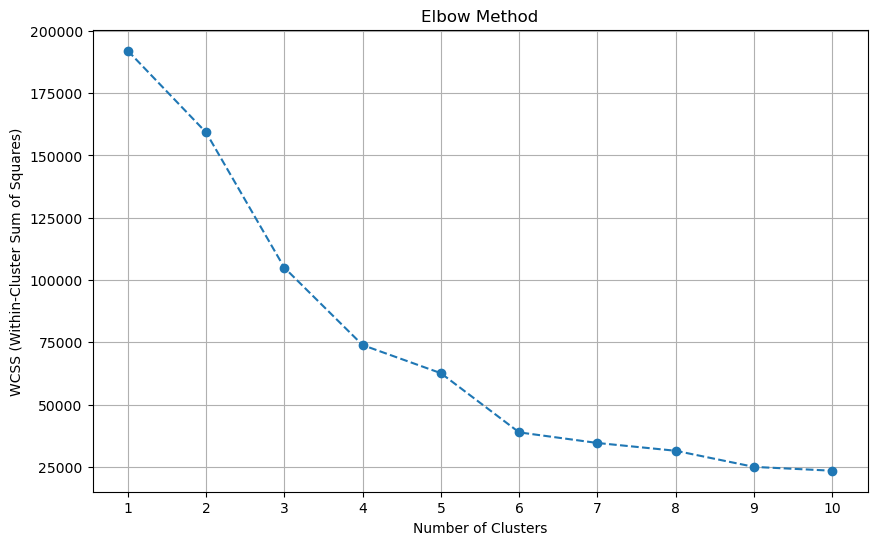

In [ ]:
from sklearn.cluster import KMeans

# to determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1,11))
plt.grid()
plt.show()

Step 3: K-Means Clustering application

In [ ]:
# Based on elbow plot, choose optimal k (let's assume k=3 for example)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters back to original dataframe
df['Cluster'] = clusters

# Cluster characteristics
cluster_profile = df.groupby('Cluster').agg({
    'Site EUI (GJ/m²)': 'mean',
    'Total (Location-Based) GHG Emissions (Metric Tons CO2e)': 'mean',
    'Property GFA - Self-Reported (m²)': 'mean',
    'Primary Property Type - Self Selected': lambda x: x.mode()[0],
    'Sector': lambda x: x.mode()[0]
}).sort_values('Site EUI (GJ/m²)', ascending=False)

print("Cluster Profiles:")
print(cluster_profile)

Cluster Profiles:
         Site EUI (GJ/m²)  \
Cluster                     
1              429.306667   
0               42.403567   
2                3.491212   

         Total (Location-Based) GHG Emissions (Metric Tons CO2e)  \
Cluster                                                            
1                                            584987.300000         
0                                               145.502627         
2                                             34433.884848         

         Property GFA - Self-Reported (m²)  \
Cluster                                      
1                             16257.100000   
0                              3540.187138   
2                            931506.842424   

        Primary Property Type - Self Selected           Sector  
Cluster                                                         
1                                      Office        Municipal  
0                                 K-12 School        Municipal  
2   

Step 5: Visualize Results

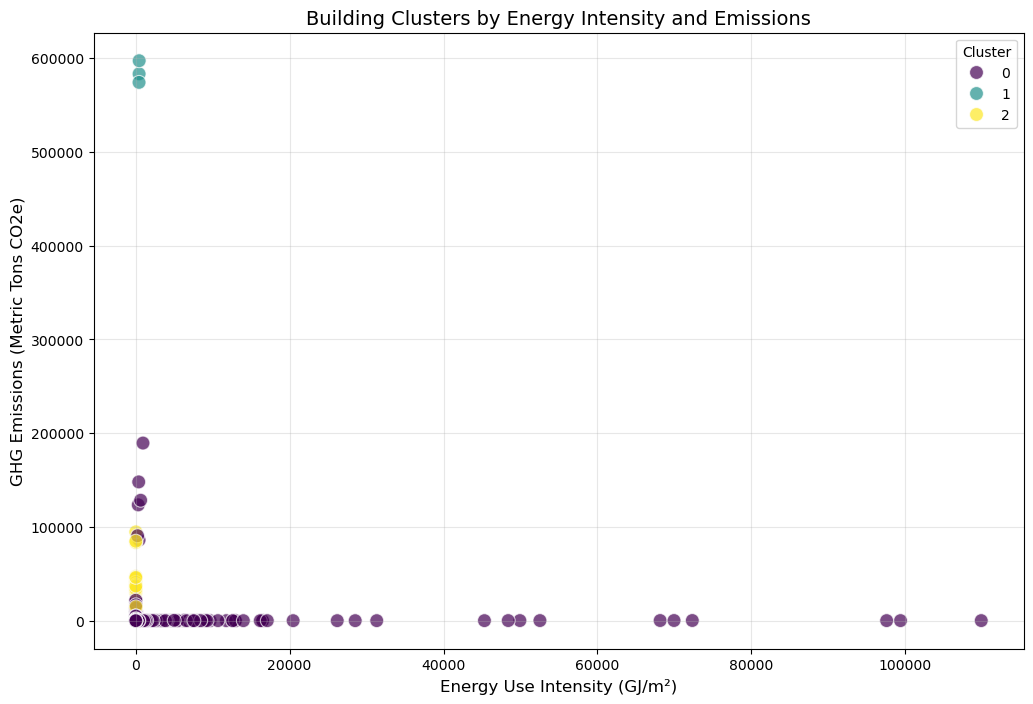

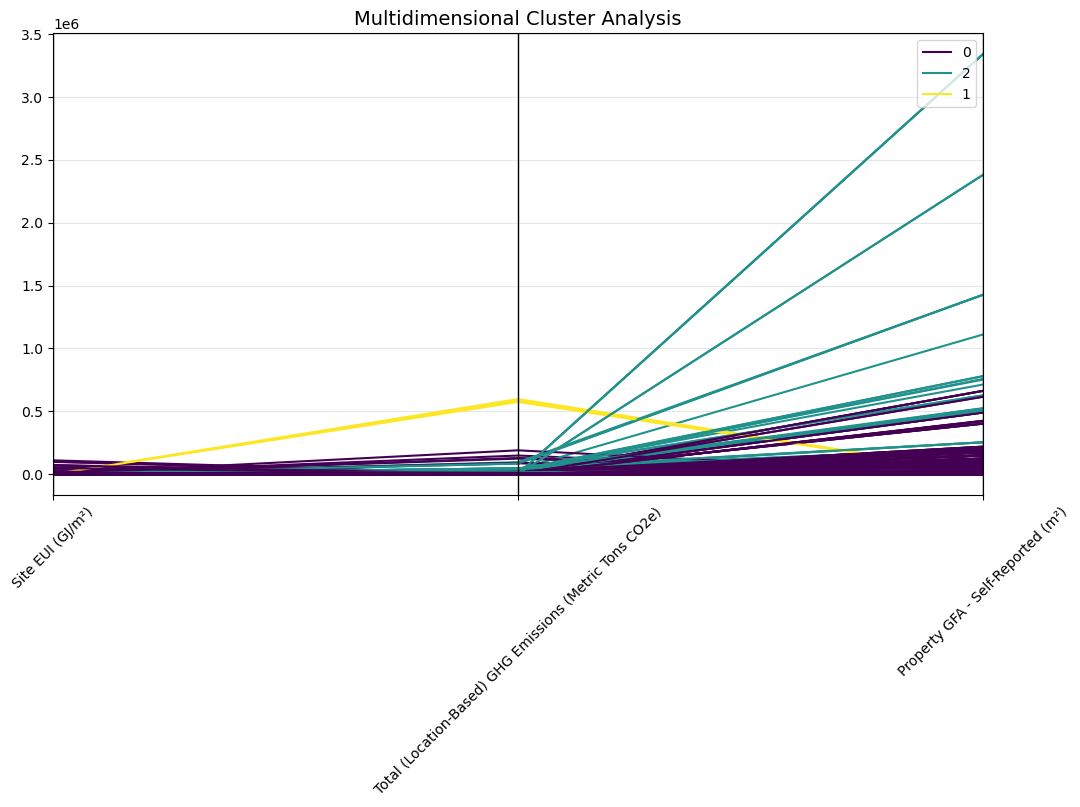

In [339]:
# 2D Visualization (EUI vs Emissions)
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, 
               x='Site EUI (GJ/m²)', 
               y='Total (Location-Based) GHG Emissions (Metric Tons CO2e)',
               hue='Cluster',
               palette='viridis',
               s=100,
               alpha=0.7)
plt.title('Building Clusters by Energy Intensity and Emissions', fontsize=14)
plt.xlabel('Energy Use Intensity (GJ/m²)', fontsize=12)
plt.ylabel('GHG Emissions (Metric Tons CO2e)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Parallel coordinates plot for multidimensional visualization
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,6))
parallel_coordinates(df[['Cluster','Site EUI (GJ/m²)',
                       'Total (Location-Based) GHG Emissions (Metric Tons CO2e)',
                       'Property GFA - Self-Reported (m²)']], 
                   'Cluster',
                   colormap='viridis')
plt.title('Multidimensional Cluster Analysis', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

Step 6: Identify High-Energy Clusters

In [340]:
# to Findout the high-energy cluster (highest average EUI)
high_energy_cluster = cluster_profile.index[0]
high_energy_buildings = df[df['Cluster'] == high_energy_cluster]

print("\nCharacteristics of High-Energy Cluster:")
print(f"Number of buildings: {len(high_energy_buildings)}")
print(f"Average EUI: {cluster_profile.iloc[0]['Site EUI (GJ/m²)']:.2f} GJ/m²")
print(f"Most common property type: {cluster_profile.iloc[0]['Primary Property Type - Self Selected']}")
print(f"Most common sector: {cluster_profile.iloc[0]['Sector']}")

# to Show top 10 highest EUI buildings in this cluster
top_offenders = high_energy_buildings.nlargest(10, 'Site EUI (GJ/m²)')
print("\nTop 10 Highest-Intensity Buildings in Cluster:")
print(top_offenders[['Property Name', 
                    'Primary Property Type - Self Selected',
                    'Site EUI (GJ/m²)']])


Characteristics of High-Energy Cluster:
Number of buildings: 3
Average EUI: 429.31 GJ/m²
Most common property type: Office
Most common sector: Municipal

Top 10 Highest-Intensity Buildings in Cluster:
      Property Name Primary Property Type - Self Selected  Site EUI (GJ/m²)
16515     CITY HALL                                Office            438.27
1471      CITY HALL                                Office            428.18
30375     CITY HALL                                Office            421.47


2.Predictive Modeling
regression model implimentation to predict future energy consumption trends.
model validation the model using metrics like RMSE (Root Mean Squared Error) and R² (R-squared).


Model Evaluation:
RMSE: 4379732.285495383
R²: 0.23602533519337532


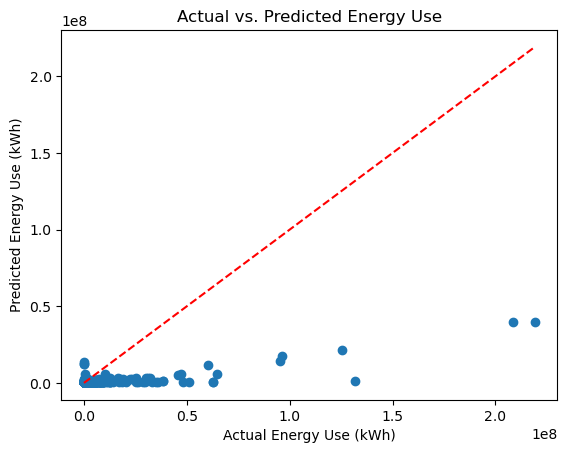

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = df[['Property GFA - Self-Reported (m²)', 'Year']] 
y = df['Electricity Use - Grid Purchase (kWh)']       

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Predicted Energy Use')
plt.xlabel('Actual Energy Use (kWh)')
plt.ylabel('Predicted Energy Use (kWh)')
plt.show()

3. Feature Importance Analysis
Identification of key factors driving high emissions using feature importance analysis.


Feature Importance:
                             Feature  Importance
0  Property GFA - Self-Reported (m²)    0.975216
1                               Year    0.024784


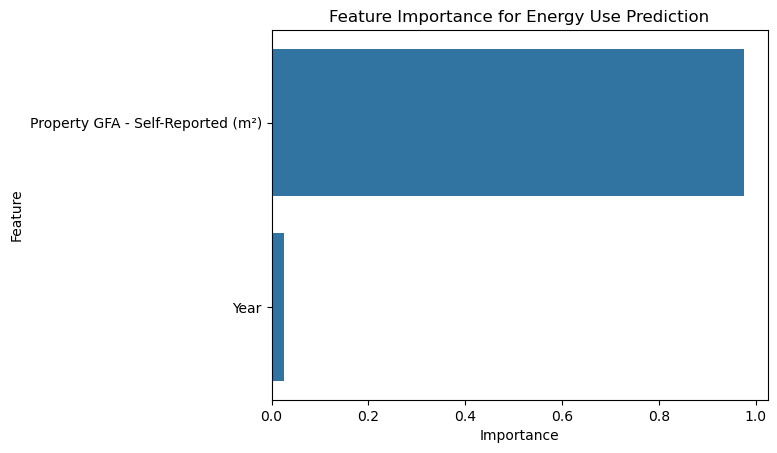

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model for training
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# to check feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)

# visualization of feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Energy Use Prediction')
plt.show()

# Summary of clustering results

In [346]:
# to summarize of clustering results
print("Cluster Characteristics:")
print(cluster_stats)

# to summarize of predictive model performance
print("\nModel Evaluation:")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# to summarize of feature importance
print("\nFeature Importance:")
print(feature_importance_df)

# to show feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Energy Use Prediction')
plt.show()

Cluster Characteristics:


NameError: name 'cluster_stats' is not defined